In [22]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

# IMPORT CUSTOM LIBRARIES
from libraries.IN8_read_data import read_IN8scan, read_IN8scan_specJun24, gen_data_df_specJun24
from functions import *

from alias import *

In [23]:
### IMPORT OF MEASUREMENTS DATA ###
data = gen_data_df_specJun24('./data/scan_database.tsv', './data/rawdata/')
sumup_col = ['name', 'notes', 'date', 'time', 'QM', 'E', 'steps']
display(data[sumup_col])

Scan 50332 not found
Scan 50333 not found
Scan 50334 not found
Scan 50335 not found
Scan 50336 not found


,name,notes,date,time,QM,E,steps
Nscan,,,,,,,
50304,sc a5,STOP,03-Jun-24,15:08:38,4.904906,-0.0134,A5= 0.1000
50305,sc a5,Scan a 2theta fisso per allineare l'analizzato...,03-Jun-24,15:08:49,4.904906,-0.0134,A5= 0.2000
50306,sc a3,Allineamento slit nel pentolone a3 => 10,03-Jun-24,15:19:27,4.904922,-0.0134,A3= 2.0000
50307,sc ei 69.68 dei 0.5 np 15 mn 2000,vediamo lo scan in energia,03-Jun-24,15:32:02,4.843829,-3.5464,EI= 0.5000
50308,sc ei 69.68 dei 0.5 np 15 mn 2000,rivediamo lo scan in ei,03-Jun-24,15:41:02,4.842048,-3.5464,EI= 0.5000
50309,sc ei 69.68 dei 0.5 np 15 mn 2000,"Facciamo una risoluzione al volo, andrà rifatta",03-Jun-24,15:54:15,0.707931,-3.5464,EI= 0.5000
50310,bs d1t 30,mettiamo la slit d1t a 20 mm,03-Jun-24,16:49:50,0.701002,-0.0134,D1T= -2.0000
50311,bs d1l 30,mettiamo la slit d1l a 13 mm,03-Jun-24,17:00:31,0.701002,-0.0134,D1L= -2.0000
50312,empty .7 300K 5000,NaN,03-Jun-24,17:49:32,0.700555,-15.0154,EN= 0.5000


# Tempi

| Monitor | Q | tempo [ore-minuti] | tempo [ore] | flusso a M1 
|---------|---|--------------------|--------------|------------
| 5000    | .7| 1:33               | 1.55         | 65
| 5000    | .9| 2:00               | 2.00         | 64
| 5000    |1.1| 2:33               | 2.55         | 63
| 5000    |1.5| 3:00               | 3.00         | 63

# Risoluzione

(-5.0, 5.0)

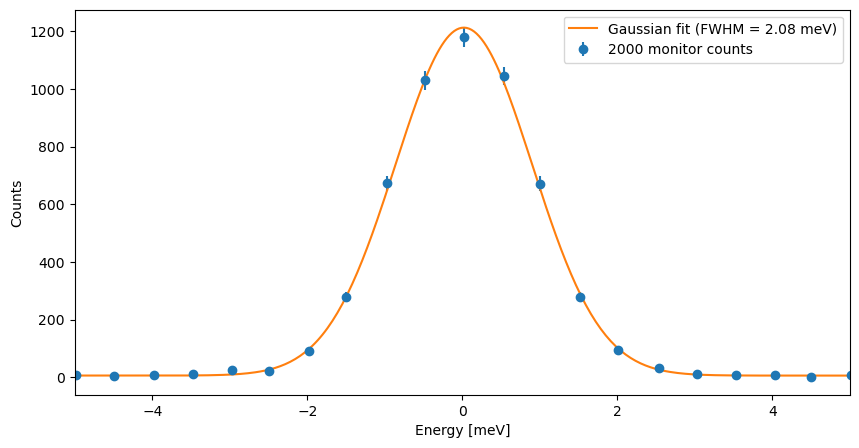

In [24]:
plt.figure(figsize=(10,5))
S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='2000 monitor counts')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EN[(S.EN>-5) & (S.EN<5)], S.CNTS[(S.EN>-5) & (S.EN<5)], sigma=S.dCNTS[(S.EN>-5) & (S.EN<5)])
X = np.linspace(S.EN.min(), S.EN.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-5,5)

(0.0, 40.0)

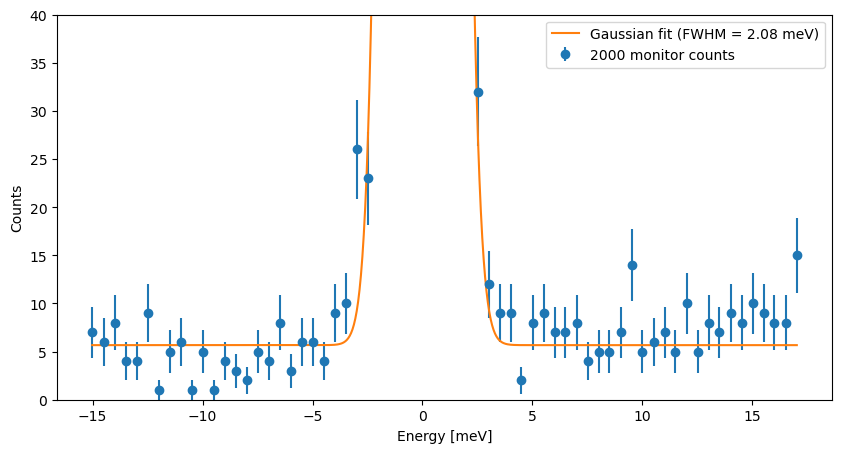

In [25]:
plt.figure(figsize=(10,5))
S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='2000 monitor counts')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EN[(S.EN>-5) & (S.EN<5)], S.CNTS[(S.EN>-5) & (S.EN<5)], sigma=S.dCNTS[(S.EN>-5) & (S.EN<5)])
X = np.linspace(S.EN.min(), S.EN.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.ylim(0,40)

### Primo test

Text(0, 0.5, 'Counts')

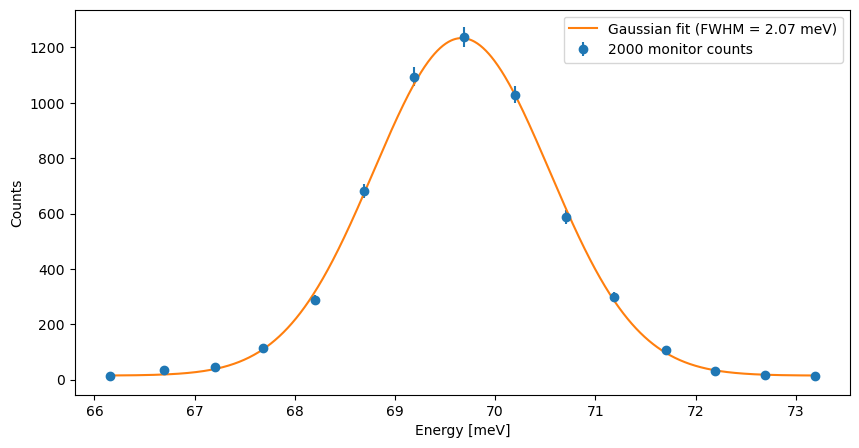

In [26]:
plt.figure(figsize=(10,5))
S = data.loc[Nvana['.7_test']].data
plt.errorbar(S.EI, S.CNTS, yerr=S.dCNTS, fmt='o', label='2000 monitor counts')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EI, S.CNTS, sigma=S.dCNTS, p0=[1000, 70, 1, 0])
X = np.linspace(S.EI.min(), S.EI.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')

# Empty cells

(-7.0, 7.0)

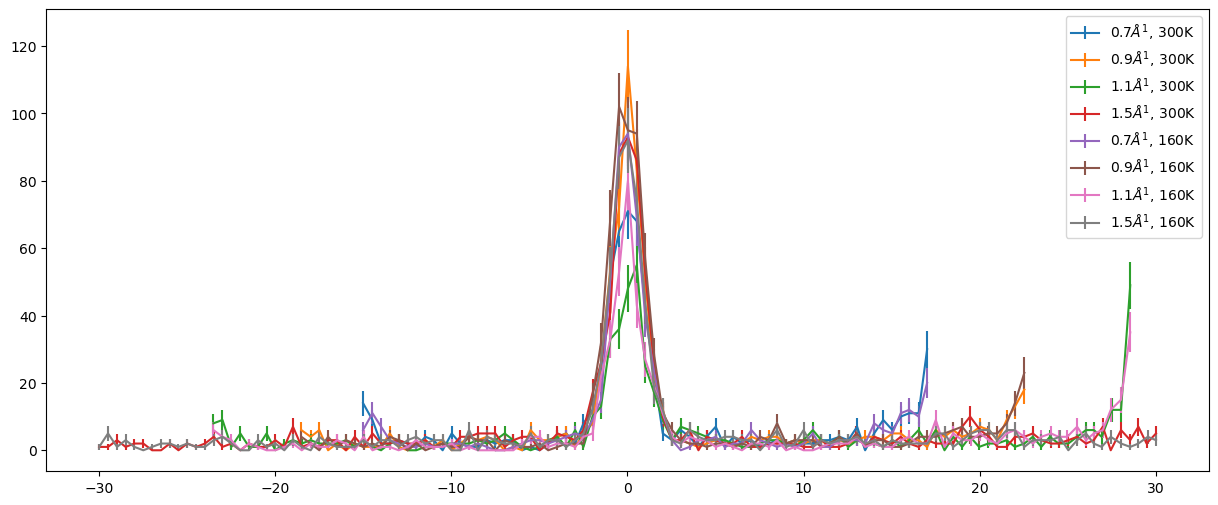

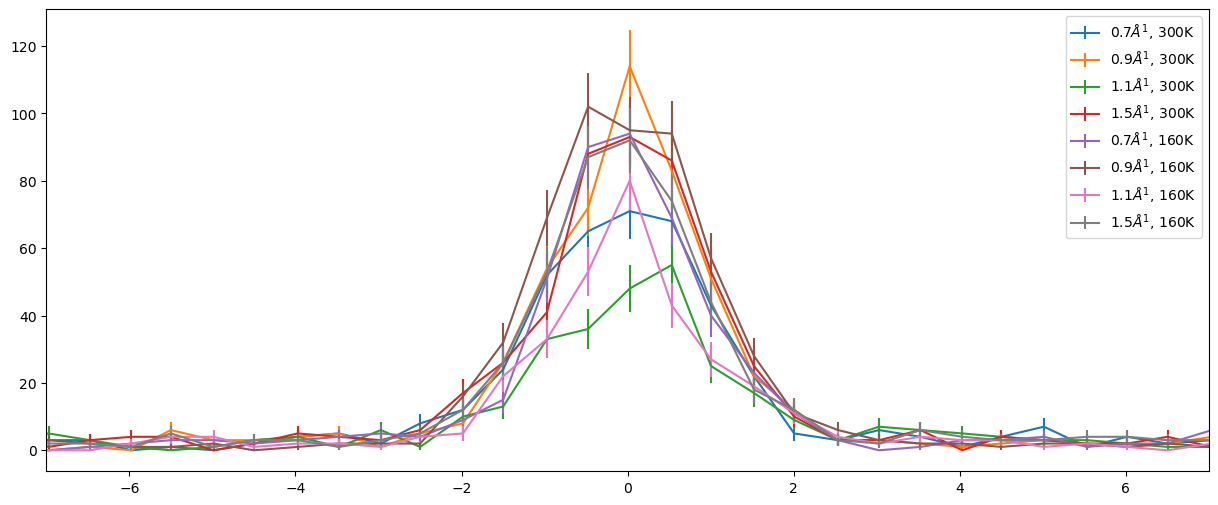

In [27]:
plt.figure(figsize=(15,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\AA^1$, {:.0f}K'.format(q, T))
plt.legend()

plt.figure(figsize=(15,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\AA^1$, {:.0f}K'.format(q, T))
plt.legend()
plt.xlim(-7,7)

# S(Q) of empty cell


| Alluminium reflection | Q[$\AA^{-1}$]
|-----------------------|--------------
| (111)                 | 2.6877
| (002)                 | 3.1035

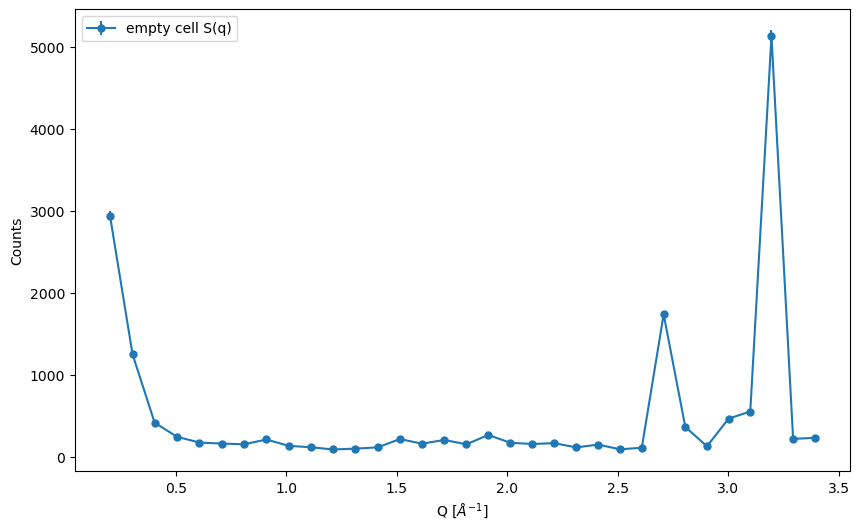

In [28]:
Sq_al = data.loc[NSq_al].data

plt.figure(figsize=(10,6))
plt.errorbar(Sq_al.QM, Sq_al.CNTS, yerr=Sq_al.dCNTS, label='empty cell S(q)', ms = 5, fmt='o-')
plt.xlabel('Q [$\AA^{-1}$]')
plt.ylabel('Counts')
plt.legend()

# S(Q) of glycerol

<ErrorbarContainer object of 3 artists>

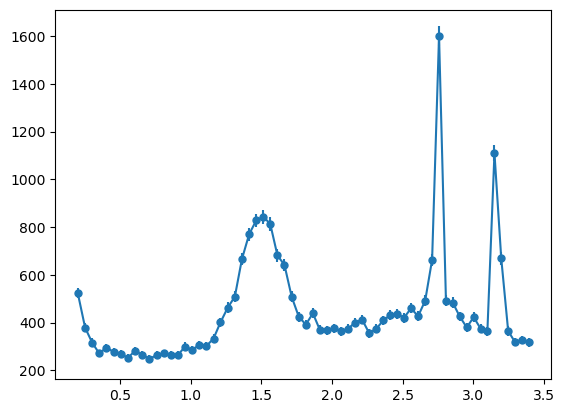

In [50]:
Sq_gly = data.loc[50328].data
plt.errorbar(Sq_gly.QM, Sq_gly.CNTS, yerr=Sq_gly.dCNTS, label='glycerol S(q)', ms = 5, fmt='o-')

<ErrorbarContainer object of 3 artists>

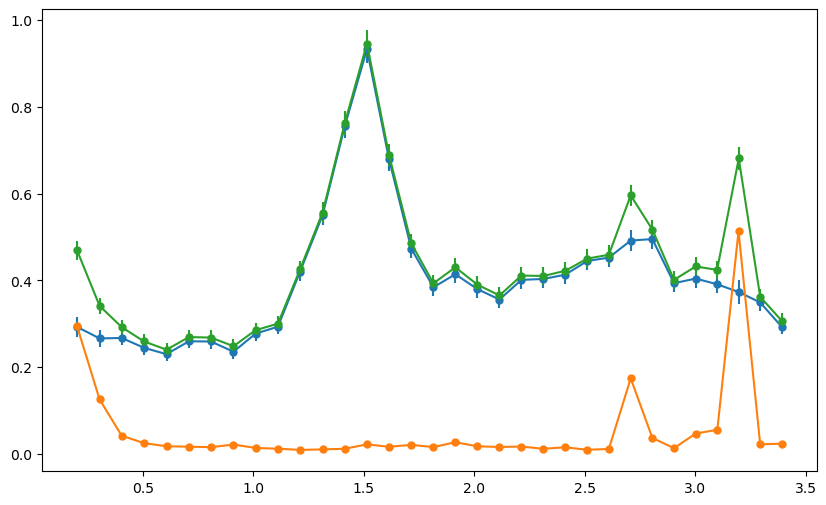

In [29]:
Sq_gly = data.loc[NSq_gly[300]].data

plt.figure(figsize=(10,6))
plt.errorbar(Sq_gly.QM, Sq_gly.CNTS/Sq_gly.M1 - .6*Sq_al.CNTS/Sq_al.M1, yerr= np.sqrt(Sq_gly.dCNTS**2/Sq_gly.M1**2 + Sq_al.dCNTS**2/Sq_al.M1**2), label='glycerol - empty', ms = 5, fmt='o-')
plt.errorbar(Sq_al.QM, Sq_al.CNTS/Sq_al.M1, yerr=Sq_al.dCNTS/Sq_al.M1, label='empty', ms = 5, fmt='o-')
plt.errorbar(Sq_gly.QM, Sq_gly.CNTS/Sq_gly.M1, yerr=Sq_gly.dCNTS/Sq_gly.M1, label='glycerol', ms = 5, fmt='o-')

# First view of glycerol (raw)

(0.0, 400.0)

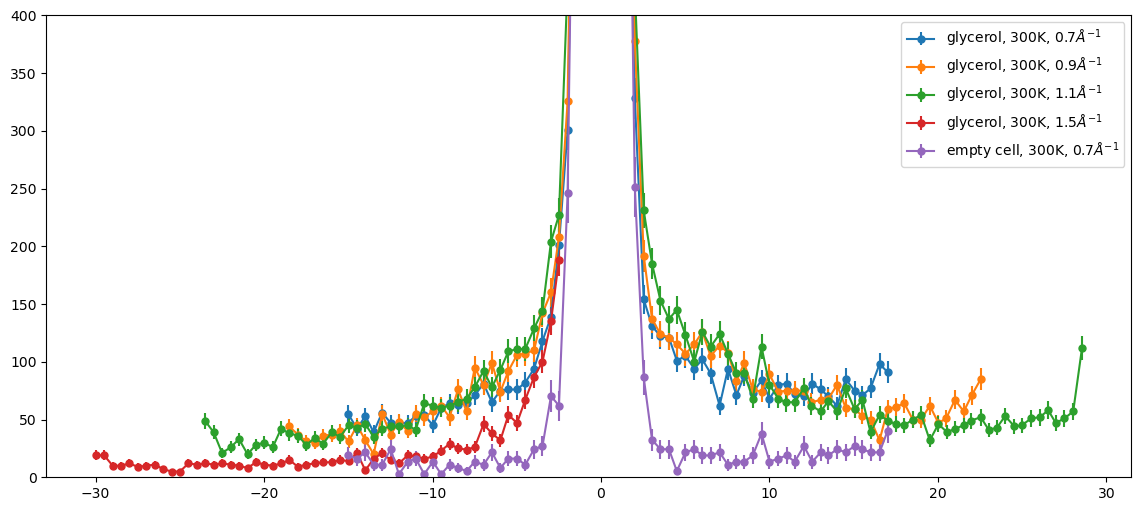

In [42]:
plt.figure(figsize=(14,6))

S = data.loc[Ngly[300,.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='glycerol, 300K, 0.7$\AA^{-1}$', ms = 5, fmt='o-')

S = data.loc[Ngly[300,.9]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='glycerol, 300K, 0.9$\AA^{-1}$', ms = 5, fmt='o-')

S = data.loc[Ngly[300,1.1]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='glycerol, 300K, 1.1$\AA^{-1}$', ms = 5, fmt='o-')

S = data.loc[Ngly[300,1.5]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='glycerol, 300K, 1.5$\AA^{-1}$', ms = 5, fmt='o-')

S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS*2.7, yerr=S.dCNTS*2.7, label='empty cell, 300K, 0.7$\AA^{-1}$', ms = 5, fmt='o-')
plt.legend()

plt.ylim(0, 400)

# Glycerol - empty cell

(0.0, 0.1)

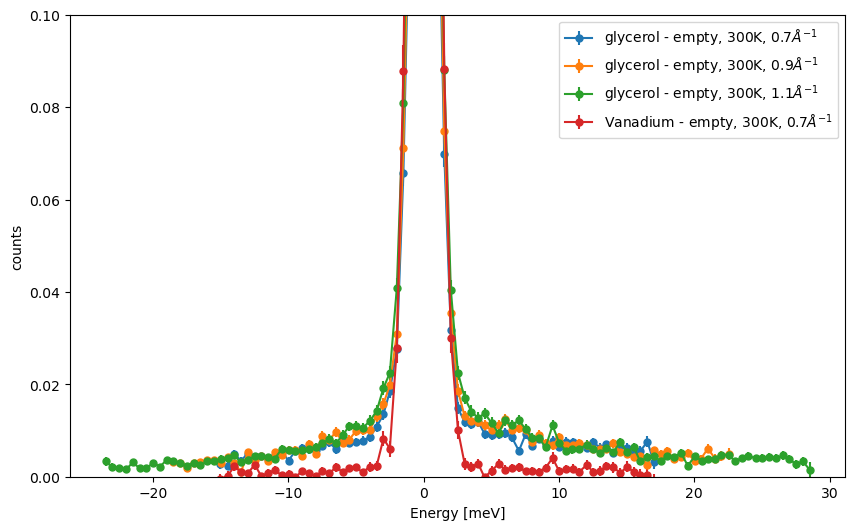

In [48]:
plt.figure(figsize=(10,6))

S = data.loc[Ngly[300,.7]].data
S_empty = data.loc[Nempty[300,.7]].data
plt.errorbar(S.EN, S.CNTS/S.M1 - S_empty.CNTS/S_empty.M1, yerr=np.sqrt(S.dCNTS**2/S.M1**2 + S_empty.dCNTS**2/S_empty.M1**2), label='glycerol - empty, 300K, 0.7$\AA^{-1}$', ms = 5, fmt='o-')

S = data.loc[Ngly[300,.9]].data
S_empty = data.loc[Nempty[300,.9]].data
plt.errorbar(S.EN, S.CNTS/S.M1 - S_empty.CNTS/S_empty.M1, yerr=np.sqrt(S.dCNTS**2/S.M1**2 + S_empty.dCNTS**2/S_empty.M1**2), label='glycerol - empty, 300K, 0.9$\AA^{-1}$', ms = 5, fmt='o-')

S = data.loc[Ngly[300,1.1]].data
S_empty = data.loc[Nempty[300,1.1]].data
plt.errorbar(S.EN, S.CNTS/S.M1 - S_empty.CNTS/S_empty.M1, yerr=np.sqrt(S.dCNTS**2/S.M1**2 + S_empty.dCNTS**2/S_empty.M1**2), label='glycerol - empty, 300K, 1.1$\AA^{-1}$', ms = 5, fmt='o-')

S = data.loc[Nvana[.7]].data
S_empty = data.loc[Nempty[300,.7]].data
plt.errorbar(S.EN, S.CNTS/S.M1 - S_empty.CNTS/S_empty.M1, yerr=np.sqrt(S.dCNTS**2/S.M1**2 + S_empty.dCNTS**2/S_empty.M1**2), label='Vanadium - empty, 300K, 0.7$\AA^{-1}$', ms = 5, fmt='o-')

plt.xlabel('Energy [meV]')
plt.ylabel('counts')
plt.legend()
plt.ylim(0, .1)
